The purpose of this notebook is to do the Statistical Rethinking [homework](https://github.com/rmcelreath/stat_rethinking_2020/tree/main/homework) using Python. (I will do the winter 2020 assignments but lectures from 2019 seem to still be okay.) Given the Bayesian preference of the course, it will be helpful for me to use my prior experience with Bayesian stats as a jumping off point. I wrote a series of blog posts starting with [this one](https://benslack19.github.io/data%20science/statistics/a-bertrands-box/). However, a public repo has been created [here](https://github.com/pymc-devs/resources/tree/master/Rethinking_2) that also uses Python. It will helpful for me to do these exercises myself, but that repo will serve as a helpful reference. Seeing the packages used in that repo is already helpful. Based on looking at package repos and [this post](https://towardsdatascience.com/hands-on-bayesian-statistics-with-python-pymc3-arviz-499db9a59501), I will start learning `arviz` and `pymc3`.

This notebook will be for the Week 1 and 2 homework.

I encountered issues simply importing those packages which made me go down another direction for employing virtual environments, finding notebook extensions, employing code formatting tools, writing scripts to make the envirionment transparent, and managing this all with `git`.

In [5]:
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import pymc3 as pm
import scipy.stats as stats
import seaborn as sns

In [6]:
%load_ext nb_black
%config InlineBackend.figure_format = 'retina'
%load_ext watermark
RANDOM_SEED = 8927
np.random.seed(RANDOM_SEED)
az.style.use("arviz-darkgrid")

<IPython.core.display.Javascript object>

# Week 1 homework

## Question 1 (3M1)

**Suppose the globe tossing data (Chapter 2) had turned out to be 8 water in 15 tosses. Construct the posterior distribution, using grid approximation. Use the same flat prior as in the book.**

The grid approximation is another way of saying that this is a discrete probability distribution. In this scenario, the x-axis are the possible values of the probability of water on the globe. The y-axis is the probability that *the water probability value* can occur. This is a potential point of confusion which I want to highlight: both x- and y-axes are probabilities, but representing different things.

**Small number of points in the grid, using bar plot (probability mass function, PMF)**

Let's start off using five points for the grid approximation, between 0 and 1, with the boundaries inclusive.

In [168]:
# Define grid
grid_points = 5
water_prob_vals = np.linspace(0, 1, grid_points)
print(water_prob_vals)

[0.   0.25 0.5  0.75 1.  ]


<IPython.core.display.Javascript object>

Then define the probabilities at each water probability value. When we say that it is a flat prior, that means all values are equally likely. In other words, *before looking at data*, what would we guess it could be? A flat prior means all water probability values are possible. Since the probabilities must sum to 1, it is straightforward to know what the height of each bar should be in the probability mass function.

In [169]:
# Define prior
prior_vals = np.repeat(1 / grid_points, grid_points)
print(prior_vals)

[0.2 0.2 0.2 0.2 0.2]


<IPython.core.display.Javascript object>

The globe tosses that resulted in 8 water in 15 tosses is a binomial distribution (likelihood). We can calculate the posterior values at each water probability value.

In [170]:
mu = 8 / 15
print("Expected mean using only the likelihood distribution: {0:0.4f}".format(mu))

Expected mean using only the likelihood distribution: 0.5333


<IPython.core.display.Javascript object>

Compute likelihood at each value in the grid.

In [171]:
likelihood = stats.binom.pmf(8, 15, water_prob_vals)
print(likelihood)

[0.         0.01310682 0.19638062 0.03932047 0.        ]


<IPython.core.display.Javascript object>

Compute product of likelihood and prior.

In [172]:
unstd_posterior = likelihood * prior_vals
print(unstd_posterior)

[0.         0.00262136 0.03927612 0.00786409 0.        ]


<IPython.core.display.Javascript object>

Standardize the posterior, so it sums to 1.

In [173]:
std_posterior = unstd_posterior / np.sum(unstd_posterior)

<IPython.core.display.Javascript object>

In [174]:
df = pd.DataFrame(
    {
        "water_prob_vals": water_prob_vals,
        "prior_vals": prior_vals,
        "likelihood": likelihood,
        "unstd_posterior": unstd_posterior,
        "std_posterior": std_posterior,
    }
)

df

,water_prob_vals,prior_vals,likelihood,unstd_posterior,std_posterior
0,0.00,0.2,0.000000,0.000000,0.000000
1,0.25,0.2,0.013107,0.002621,0.052678
2,0.50,0.2,0.196381,0.039276,0.789286
3,0.75,0.2,0.039320,0.007864,0.158035
4,1.00,0.2,0.000000,0.000000,0.000000


<IPython.core.display.Javascript object>

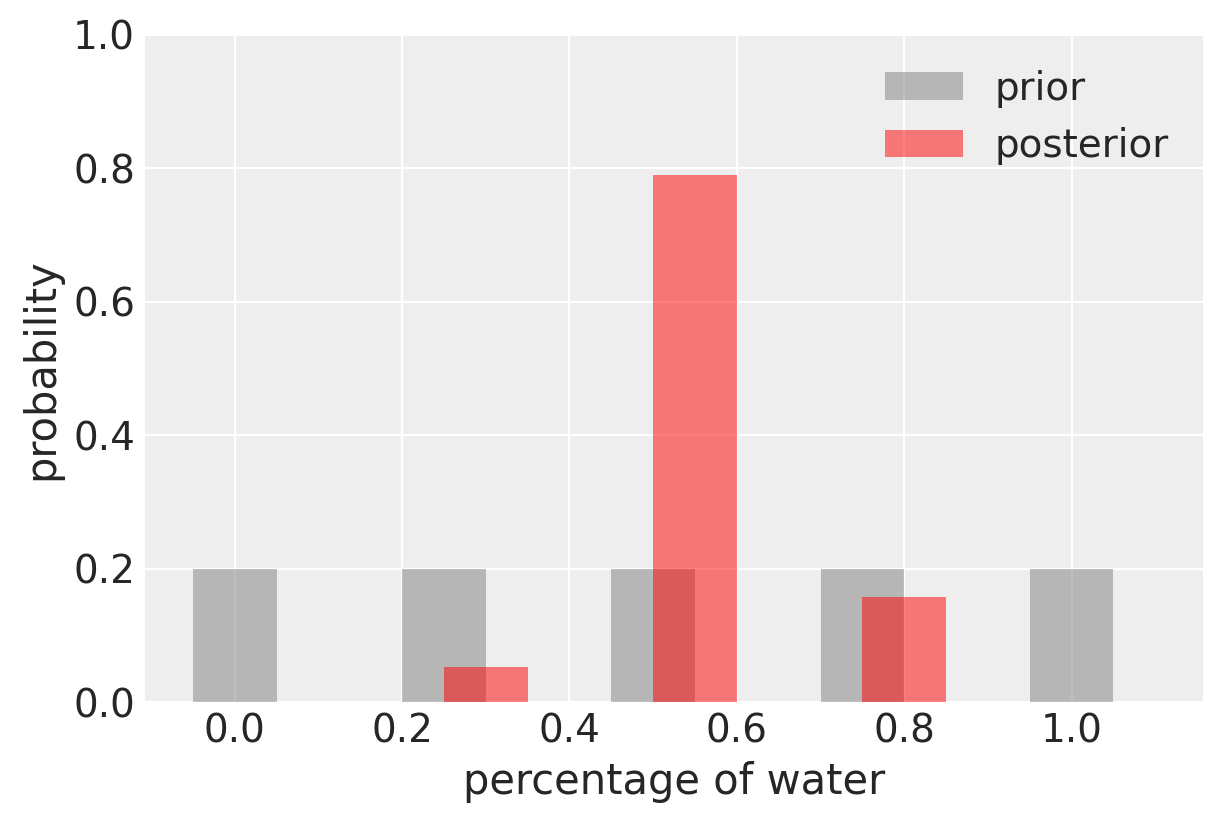

<IPython.core.display.Javascript object>

In [176]:
f, ax1 = plt.subplots(figsize=(6, 4))

ax1.bar(
    data=df,
    x=water_prob_vals,
    height=prior_vals,
    width=0.1,
    color="gray",
    alpha=0.5,
    label="prior",
    align="center",
)

ax1.bar(
    data=df,
    x=water_prob_vals,
    height=std_posterior,
    width=0.1,
    color="red",
    alpha=0.5,
    label="posterior",
    align="edge",
)

ax1.set_ylabel("probability")
ax1.set_xlabel("percentage of water")
ax1.set_ylim([None, 1])
ax1.legend()

## Question 2 (3M5)

Start over in 1, but now use a prior that is zero below p = 0.5 and a constant above p = 0.5. This corresponds to prior information that a majority of the Earth’s surface is water. What difference does the better prior make?

**Larger number of points in the grid.**

In [177]:
def create_df_bayes(gp):
    """
    Use above code and specify the number of gridpoints.
    """

    wat_prob_vals = np.linspace(0, 1, gp)
    prior_vals = np.where(wat_prob_vals < 0.5, 0, 1)  # specific to this question
    likelihood_vals = stats.binom.pmf(8, 15, wat_prob_vals)
    unstd_posterior_vals = likelihood_vals * prior_vals
    std_posterior_vals = unstd_posterior_vals / np.sum(unstd_posterior_vals)
    df_bayes = pd.DataFrame(
        {
            "wat_prob_vals": wat_prob_vals,
            "prior_vals": prior_vals,
            "likelihood_vals": likelihood_vals,
            "unstd_posterior_vals": unstd_posterior_vals,
            "std_posterior_vals": std_posterior_vals,
        }
    )

    return df_bayes

<IPython.core.display.Javascript object>

In [178]:
df2 = create_df_bayes(100)
df2

,wat_prob_vals,prior_vals,likelihood_vals,unstd_posterior_vals,std_posterior_vals
0,0.000000,0,0.000000e+00,0.000000e+00,0.000000e+00
1,0.010101,0,6.495359e-13,0.000000e+00,0.000000e+00
2,0.020202,0,1.547614e-10,0.000000e+00,0.000000e+00
3,0.030303,0,3.688836e-09,0.000000e+00,0.000000e+00
4,0.040404,0,3.424253e-08,0.000000e+00,0.000000e+00
...,...,...,...,...,...
95,0.959596,1,8.132600e-07,8.132600e-07,2.197128e-07
96,0.969697,1,1.180427e-07,1.180427e-07,3.189079e-08
97,0.979798,1,7.505929e-09,7.505929e-09,2.027825e-09
98,0.989899,1,6.365452e-11,6.365452e-11,1.719710e-11


<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='wat_prob_vals', ylabel='std_posterior_vals'>

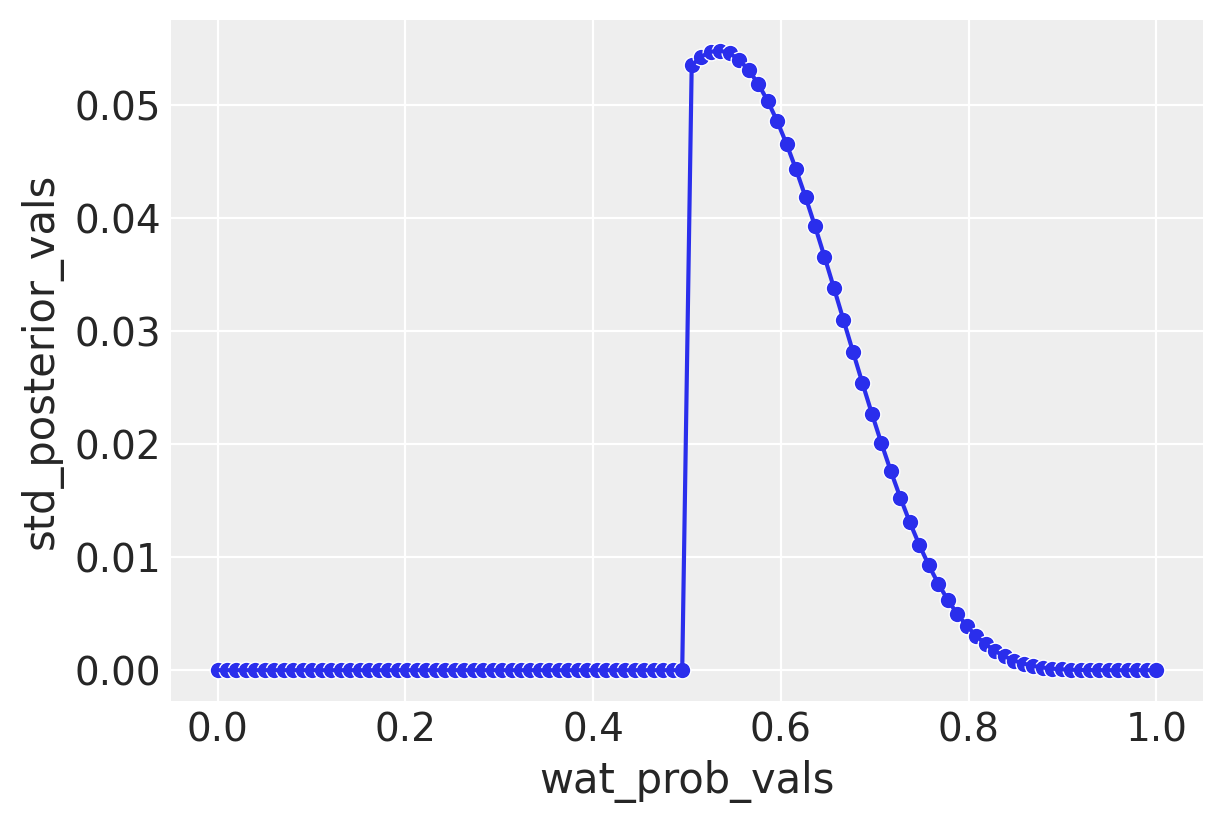

<IPython.core.display.Javascript object>

In [179]:
f, ax1 = plt.subplots(figsize=(6, 4))
sns.scatterplot(data=df2, x="wat_prob_vals", y="std_posterior_vals", ax=ax1)
sns.lineplot(data=df2, x="wat_prob_vals", y="std_posterior_vals", ax=ax1)

The new prior specifies clearly what values shouldn't really be considered at all, even before looking at data.

## Question 3

For the posterior distribution from 2, compute 89% percentile and HPDI intervals. Compare the widths of these intervals. Which is wider? Why? If you had only the information in the interval, what might you misunderstand about the shape of the posterior distribution?

This makes use of the `pymc3` function for quadratic approximation that is available in the R `rethinking` package (`quap`).

This is about sampling randomly from the posterior to visualize uncertainty, computing confidence intervals, and simulating observations. MCMC produces only samples, so good to get used to this now. **Above all, it's easier to think with samples** and transforms a hard calculus problem into an easy data summary problem.

For using `pymc3`, an explanation is shown [here](https://docs.pymc.io/notebooks/getting_started.html).

### Run R code to help compare

Taken from [here](https://github.com/rmcelreath/statrethinking_winter2019/blob/master/homework/week01_solutions.pdf).

In [3]:
%load_ext rpy2.ipython

<IPython.core.display.Javascript object>

In [4]:
%%R
suppressMessages(library(tidyverse))
suppressMessages(library(rethinking))

<IPython.core.display.Javascript object>

In [5]:
%%R

print(W)

R[write to console]: Error in print(W) : object 'W' not found




Error in print(W) : object 'W' not found


<IPython.core.display.Javascript object>

In [6]:
%%R

set.seed(100)
N <- 20
p_true <- 0.7
W <- rbinom(1, size=N, prob=p_true)
p_grid <- seq(from=0, to=1, length.out=1000)
prior <- rep(1, 1000)
prob_data <- dbinom(W, size=N, prob=p_grid)
posterior <- prob_data * prior
posterior <- posterior/sum(posterior)
samples <- sample(p_grid, prob=posterior, size=1e4, replace=TRUE)
PI99 <- PI(samples, 0.99)
as.numeric(PI99[2] - PI99[1])

[1] 0.4544595


<IPython.core.display.Javascript object>

In [9]:
%%R

# Get 20 samples from the new posterior distribution
head(samples, 20)

 [1] 0.7117117 0.6236236 0.6796797 0.7177177 0.6996997 0.7197197 0.7097097
 [8] 0.8378378 0.9029029 0.7937938 0.7117117 0.6886887 0.6766767 0.7227227
[15] 0.7927928 0.7287287 0.8368368 0.6916917 0.7647648 0.7507508


<IPython.core.display.Javascript object>

### Python code

See [here](https://docs.pymc.io/api/distributions/continuous.html#pymc3.distributions.continuous.Uniform) for syntax when specifying uniform prior.

In [7]:
data = np.repeat((0, 1), (8, 11))
with pm.Model() as normal_approximation:
    p = pm.Uniform("p", lower=0.5, upper=1)  # uniform priors
    w = pm.Binomial("w", n=len(data), p=p, observed=data.sum())  # binomial likelihood
    mean_q = pm.find_MAP()
    std_q = ((1 / pm.find_hessian(mean_q, vars=[p])) ** 0.5)[0]


# display summary of quadratic approximation
print("  Mean, Standard deviation\np {:.2}, {:.2}".format(mean_q["p"], std_q[0]))


  Mean, Standard deviation
p 0.58, 0.11


<IPython.core.display.Javascript object>

In [8]:
# next line is not part of assignment, but I was wondering how to sample
# saw this https://docs.pymc.io/notebooks/posterior_predictive.html
with normal_approximation as model:
    samples = pm.sample(100, tune=2000, random_seed=100, return_inferencedata=True)


Only 100 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [p]


Sampling 4 chains for 2_000 tune and 100 draw iterations (8_000 + 400 draws total) took 10 seconds.


<IPython.core.display.Javascript object>

In [10]:
samples

Inference data with groups:
	> posterior
	> log_likelihood
	> sample_stats
	> observed_data

<IPython.core.display.Javascript object>

In [11]:
# Compute the 89% percentile interval
norm = stats.norm(mean_q, std_q)
prob = 0.99
z = stats.norm.ppf([(1 - prob) / 2, (1 + prob) / 2])
pi = mean_q["p"] + std_q * z
print("5.5%, 94.5% \n{:.2}, {:.2}".format(pi[0], pi[1]))

5.5%, 94.5% 
0.29, 0.87


<IPython.core.display.Javascript object>

I don't think this syntax is alright, but basically the distribution will get tighter and taller as more tosses are made.

See about posterior predictive distributions.

# Appendix: Environment and system parameters

In [157]:
%watermark -n -u -v -iv -w

Last updated: Tue Feb 09 2021

Python implementation: CPython
Python version       : 3.8.6
IPython version      : 7.20.0

pandas    : 1.2.1
seaborn   : 0.11.1
matplotlib: 3.3.4
json      : 2.0.9
pymc3     : 3.11.0
scipy     : 1.6.0
numpy     : 1.20.1
arviz     : 0.11.1

Watermark: 2.1.0



<IPython.core.display.Javascript object>

In [158]:
# Custom scripts to show packages and versions in this notebook
def imports():
    import types

    for name, val in globals().items():
        if isinstance(val, types.ModuleType):
            yield val.__name__


imported_packages = list(imports())

from active_pkg import show_pkg_vers_in_nb

show_pkg_vers_in_nb(imported_packages)

# Name                    Version                   Build  Channel
arviz                     0.11.1                   pypi_0    pypi
matplotlib                3.3.4                    pypi_0    pypi
numpy                     1.20.1                   pypi_0    pypi
pandas                    1.2.1                    pypi_0    pypi
pymc3                     3.11.0                   pypi_0    pypi
scipy                     1.6.0                    pypi_0    pypi
seaborn                   0.11.1                   pypi_0    pypi


<IPython.core.display.Javascript object>